**Demand forcaste using random forest**

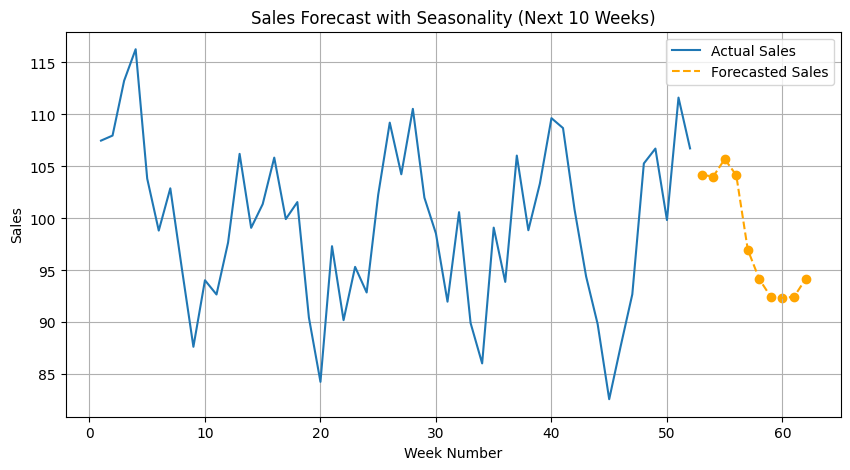

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Simulate sales data
np.random.seed(42)
weeks = np.arange(1, 53)
sales = 100 + 10 * np.sin(2 * np.pi * weeks / 12) + np.random.normal(0, 5, 52)

data = pd.DataFrame({
    'week': weeks,
    'sales': sales
})

# Add seasonality features
data['sin_week'] = np.sin(2 * np.pi * data['week'] / 52)
data['cos_week'] = np.cos(2 * np.pi * data['week'] / 52)

# Features and label
X = data[['week', 'sin_week', 'cos_week']]
y = data['sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Future weeks (53–62)
future_weeks = pd.DataFrame({'week': np.arange(53, 63)})
future_weeks['sin_week'] = np.sin(2 * np.pi * future_weeks['week'] / 52)
future_weeks['cos_week'] = np.cos(2 * np.pi * future_weeks['week'] / 52)

# Predict future sales
future_sales = model.predict(future_weeks)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(data['week'], data['sales'], label='Actual Sales')
plt.plot(future_weeks['week'], future_sales, linestyle='--', color='orange', label='Forecasted Sales')
plt.scatter(future_weeks['week'], future_sales, color='orange')
plt.xlabel("Week Number")
plt.ylabel("Sales")
plt.title("Sales Forecast with Seasonality (Next 10 Weeks)")
plt.legend()
plt.grid(True)
plt.show()


**Route Optimization (Traveling Salesman Problem)**

distance_matrix = [[0, 3, 6, 2, 10, 6], [3, 0, 3, 1, 7, 4], [6, 3, 0, 4, 4, 1], [2, 1, 4, 0, 8, 5], [10, 7, 4, 8, 0, 5], [6, 4, 1, 5, 5, 0]]
transit_callback_index = 1
Optimized Delivery Route: [0, 3, 1, 2, 4, 5, 0]


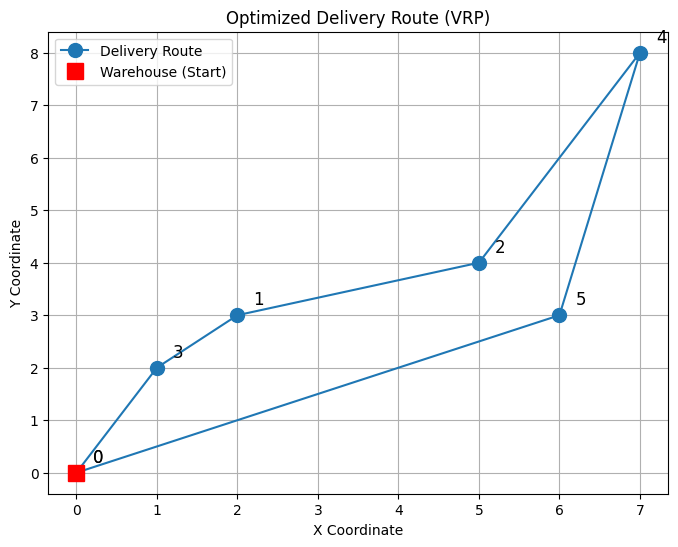

In [ ]:
!pip install ortools

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 📊 Generate sample weekly demand data
np.random.seed(42)
weeks = np.arange(1, 53)
sales = 100 + 10 * np.sin(2 * np.pi * weeks / 12) + np.random.normal(0, 5, 52)  # seasonal + noise

data = pd.DataFrame({
    'week': weeks,
    'sales': sales
})

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# 📍 Coordinates: 6 delivery points (random example)
locations = [
    (0, 0),   # Warehouse
    (2, 3),
    (5, 4),
    (1, 2),
    (7, 8),
    (6, 3)
]

# 🔧 Distance Matrix (Euclidean)
def compute_distance_matrix(locations):
    size = len(locations)
    matrix = []
    for i in range(size):
        row = []
        for j in range(size):
            dist = np.linalg.norm(np.array(locations[i]) - np.array(locations[j]))
            row.append(int(dist))
        matrix.append(row)
    return matrix

distance_matrix = compute_distance_matrix(locations)
print("distance_matrix","=",distance_matrix)

# 🧠 Create routing model
manager = pywrapcp.RoutingIndexManager(len(distance_matrix), 1, 0)
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    return distance_matrix[manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
print("transit_callback_index","=",transit_callback_index)

# 🚛 Solve
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
solution = routing.SolveWithParameters(search_parameters)

# 📋 Print route
if solution:
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        index = solution.Value(routing.NextVar(index))
    route.append(manager.IndexToNode(index))
    print("Optimized Delivery Route:", route)
else:
    print("No solution found.")

# 📉 Plot the optimized route
route_coords = [locations[i] for i in route]  # get (x, y) coords in route order
x, y = zip(*route_coords)
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o-', markersize=10, label='Delivery Route')
plt.plot(x[0], y[0], 'rs', markersize=12, label='Warehouse (Start)')
for i, point in enumerate(route):
  plt.text(x[i] + 0.2, y[i] + 0.2, f"{point}", fontsize=12)
plt.title("Optimized Delivery Route (VRP)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


***Weather forcasting for hilly area ***

future_temp = [27.09378571 26.70221429 26.65821429 26.66335714 26.61835714 26.26564286
 26.0685     26.06478571 26.00714286 25.90928571 25.82885714 25.43328571
 23.52542857 22.8785     22.07757143]


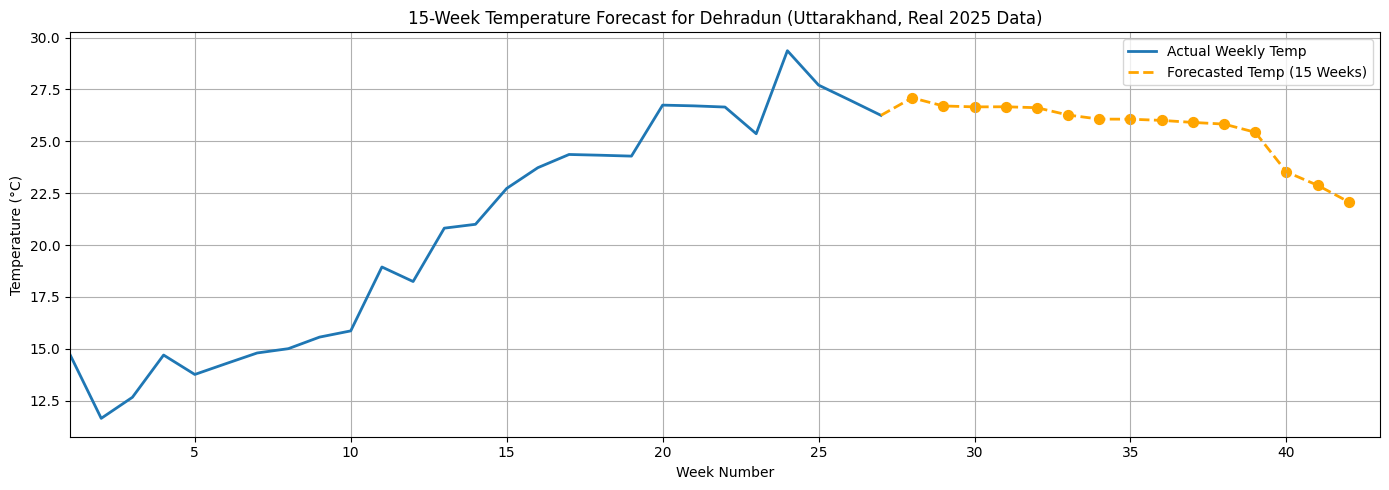

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import requests

# --------------------------------------
# STEP 1: Fetch Real Weather Data (2025)
# --------------------------------------
latitude = 30.32
longitude = 78.03
start_date = '2025-01-01'
end_date = '2025-07-05'

url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=temperature_2m_max,temperature_2m_min,precipitation_sum"
    f"&timezone=Asia%2FKolkata"
)

response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame({
    "date": data["daily"]["time"],
    "temp_max": data["daily"]["temperature_2m_max"],
    "temp_min": data["daily"]["temperature_2m_min"],
    "rainfall_mm": data["daily"]["precipitation_sum"]
})
df["date"] = pd.to_datetime(df["date"])
df["temp_avg"] = (df["temp_max"] + df["temp_min"]) / 2
df["week"] = df["date"].dt.isocalendar().week

# --------------------------------------
# STEP 2: Weekly Aggregation with Seasonality
# --------------------------------------
weekly_data = df.groupby("week").agg({"temp_avg": "mean"}).reset_index()
weekly_data = weekly_data.sort_values("week")

# Add seasonality features
weekly_data["sin_week"] = np.sin(2 * np.pi * weekly_data["week"] / 52)
weekly_data["cos_week"] = np.cos(2 * np.pi * weekly_data["week"] / 52)

# --------------------------------------
# STEP 3: Train Random Forest Model
# --------------------------------------
X = weekly_data[["week", "sin_week", "cos_week"]]
y = weekly_data["temp_avg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --------------------------------------
# STEP 4: Predict Next 15 Weeks
# --------------------------------------
last_week = weekly_data["week"].max()
future_weeks = pd.DataFrame({"week": np.arange(last_week + 1, last_week + 16)})
future_weeks["sin_week"] = np.sin(2 * np.pi * future_weeks["week"] / 52)
future_weeks["cos_week"] = np.cos(2 * np.pi * future_weeks["week"] / 52)

future_temp = model.predict(future_weeks)
print("future_temp","=",future_temp)

# Combine actual and forecast
last_point = weekly_data.iloc[-1]
future_plot_weeks = np.insert(future_weeks["week"], 0, last_point["week"])
future_plot_temp = np.insert(future_temp, 0, last_point["temp_avg"])

# --------------------------------------
# STEP 5: Plot Actual + Forecast
# --------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(weekly_data["week"], weekly_data["temp_avg"], label="Actual Weekly Temp", linewidth=2)
plt.plot(future_plot_weeks, future_plot_temp, linestyle='--', color='orange', label="Forecasted Temp (15 Weeks)", linewidth=2)
plt.scatter(future_weeks["week"], future_temp, color='orange', s=50)

plt.xlabel("Week Number")
plt.ylabel("Temperature (°C)")
plt.title("15-Week Temperature Forecast for Dehradun (Uttarakhand, Real 2025 Data)")
plt.grid(True)
plt.legend()
plt.xlim(1, last_week + 16)
plt.tight_layout()
plt.show()
